In [78]:
#importing important sklearn libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt



In [79]:
#Loading California Housing Dataset
housing_dataset = fetch_california_housing()

In [80]:
#Looking at the dataset to get an idea
print(housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [81]:
#Checking the features name
housing_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [82]:
#Checking the target name
housing_dataset.target_names

['MedHouseVal']

In [83]:
#Defining x, y
x = housing_dataset['data']
y = housing_dataset['target']
feature_names = housing_dataset['feature_names']

In [84]:
#Putting all Features on uniform scale uing StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [85]:
# Splitting the data into Train and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)


In [86]:
#Using LinerRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [87]:
#Evaluation Metrics
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5757877060324511 0.555891598695244


In [88]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [89]:
print(mi)

[0.38695522 0.03327305 0.10268265 0.0244562  0.02214257 0.07311396
 0.37017252 0.40203848]


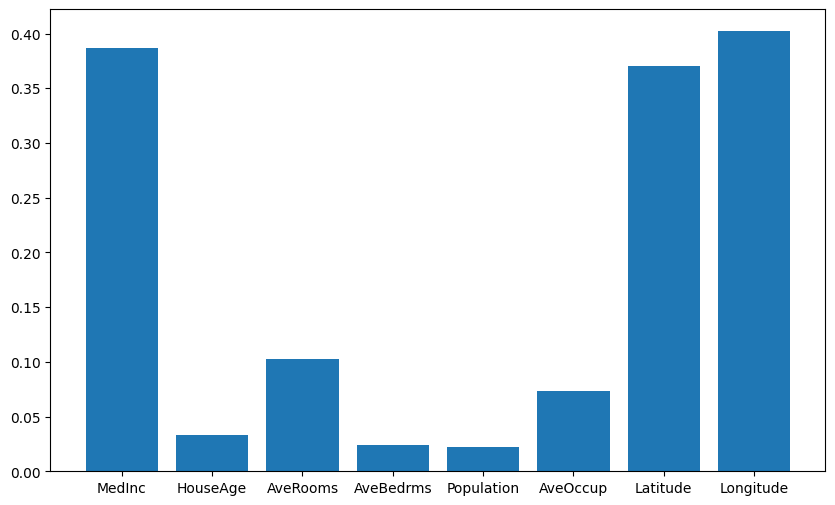

In [90]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

In [91]:
## Using SelectPercentile
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

(20640, 4)


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)

In [104]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5749693819995385 0.5569639378550829


In [105]:
## Using SelectKBest
x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)

In [106]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5749693819995385 0.5569639378550829


In [108]:
#### Pearson Correlation
#### Analyse the relationship between 'each' individual feature (input) and output
## Using f_regression
from sklearn.feature_selection import f_regression, SelectKBest

In [109]:
x_new = SelectKBest(f_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.5749693819995385 0.5569639378550829


In [111]:
#### Analyses relationship b/w the features themselves
import pandas as pd

In [112]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [113]:
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [115]:
import seaborn as sns

<Axes: >

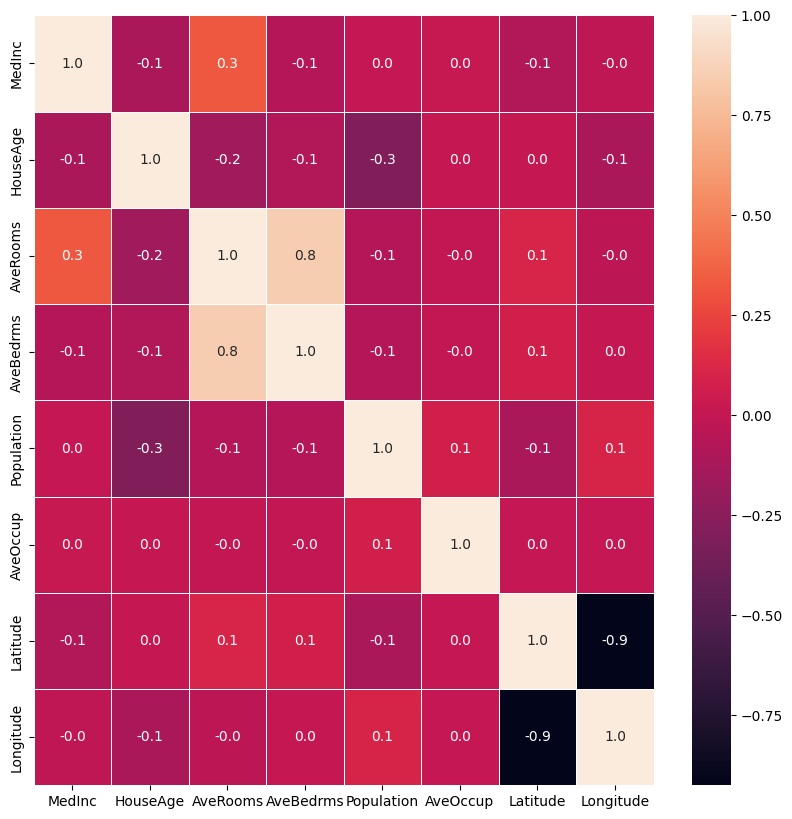

In [116]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [117]:
x_new = x_pd.drop(['HouseAge', 'AveOccup'], axis=1)
x_new.head()

,MedInc,AveRooms,AveBedrms,Population,Latitude,Longitude
0,2.344766,0.628559,-0.153758,-0.974429,1.052548,-1.327835
1,2.332238,0.327041,-0.263336,0.861439,1.043185,-1.322844
2,1.782699,1.155620,-0.049016,-0.820777,1.038503,-1.332827
3,0.932968,0.156966,-0.049833,-0.766028,1.038503,-1.337818
4,-0.012881,0.344711,-0.032906,-0.759847,1.038503,-1.337818


In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.5693323031333066 0.5643508166124452


In [134]:
### **Wrapper Based Methods**
#### Recurive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
print(selector.ranking_, )

[4 3 2 1 1 1 1 1]


In [66]:
X_new = selector.transform(x)
print(X_new.shape)

(20640, 5)


In [121]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.25657482505310414 0.9741910239007238


In [132]:
#### Sequential Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

# Regression
ridge = RidgeCV().fit(x, y)

In [123]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(x, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [124]:
x_new = sfs_forward.transform(x)
x_new.shape

(20640, 4)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.5088800081000431 0.6435680467793014


In [131]:
##Dimensionality Reduction Technique (PCA)
#Import PCA module
from sklearn.decomposition import PCA
x_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(x_new.shape)

(20640, 4)


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.43550649193564794 0.7397173611262287
